In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

In [2]:
# Paths
train_path = '/content/drive/MyDrive/LEAFLENS/HyperParameter/AUGMENTED_TRAIN'
val_path = '/content/drive/MyDrive/LEAFLENS/HyperParameter/val'
test_path = '/content/drive/MyDrive/LEAFLENS/HyperParameter/test'

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(299, 299),
    shuffle=True,
    batch_size=32,
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=(299, 299),
    shuffle=True,
    batch_size=32,
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(299, 299),
    shuffle=False,
    batch_size=32
)

# Get class names
labels = train_ds.class_names
print("Labels:", labels)


Found 21000 files belonging to 70 classes.
Found 1325 files belonging to 70 classes.
Found 742 files belonging to 70 classes.
Labels: ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Kohlrabi', 'Lantana', 'Lemon', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Patharchatta', 'Pomoegranate', 'Pumpkin', 'Rose', 'Sampige', 'Seethapala', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


In [3]:
# List of classes
class_names = [
   'Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Kohlrabi', 'Lantana', 'Lemon', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Patharchatta', 'Pomoegranate', 'Pumpkin', 'Rose', 'Sampige', 'Seethapala', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala'
   ]

# Mapping of class names to labels
class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Display the mapping
for class_name, label in class_to_label.items():
    print(f"{class_name}: {label}")


Aloevera: 0
Amla: 1
Amruthaballi: 2
Arali: 3
Astma_weed: 4
Badipala: 5
Balloon_Vine: 6
Bamboo: 7
Beans: 8
Betel: 9
Bhrami: 10
Bringaraja: 11
Caricature: 12
Castor: 13
Catharanthus: 14
Chakte: 15
Chilly: 16
Citron lime (herelikai): 17
Coffee: 18
Common rue(naagdalli): 19
Coriender: 20
Curry: 21
Doddpathre: 22
Ekka: 23
Eucalyptus: 24
Ganigale: 25
Ganike: 26
Gasagase: 27
Ginger: 28
Globe Amarnath: 29
Guava: 30
Henna: 31
Hibiscus: 32
Honge: 33
Insulin: 34
Jackfruit: 35
Kohlrabi: 36
Lantana: 37
Lemon: 38
Malabar_Nut: 39
Malabar_Spinach: 40
Mango: 41
Marigold: 42
Mint: 43
Neem: 44
Nelavembu: 45
Nerale: 46
Nooni: 47
Onion: 48
Padri: 49
Palak(Spinach): 50
Papaya: 51
Parijatha: 52
Patharchatta: 53
Pomoegranate: 54
Pumpkin: 55
Rose: 56
Sampige: 57
Seethapala: 58
Tamarind: 59
Taro: 60
Tecoma: 61
Thumbe: 62
Tomato: 63
Tulsi: 64
Turmeric: 65
ashoka: 66
camphor: 67
kamakasturi: 68
kepala: 69


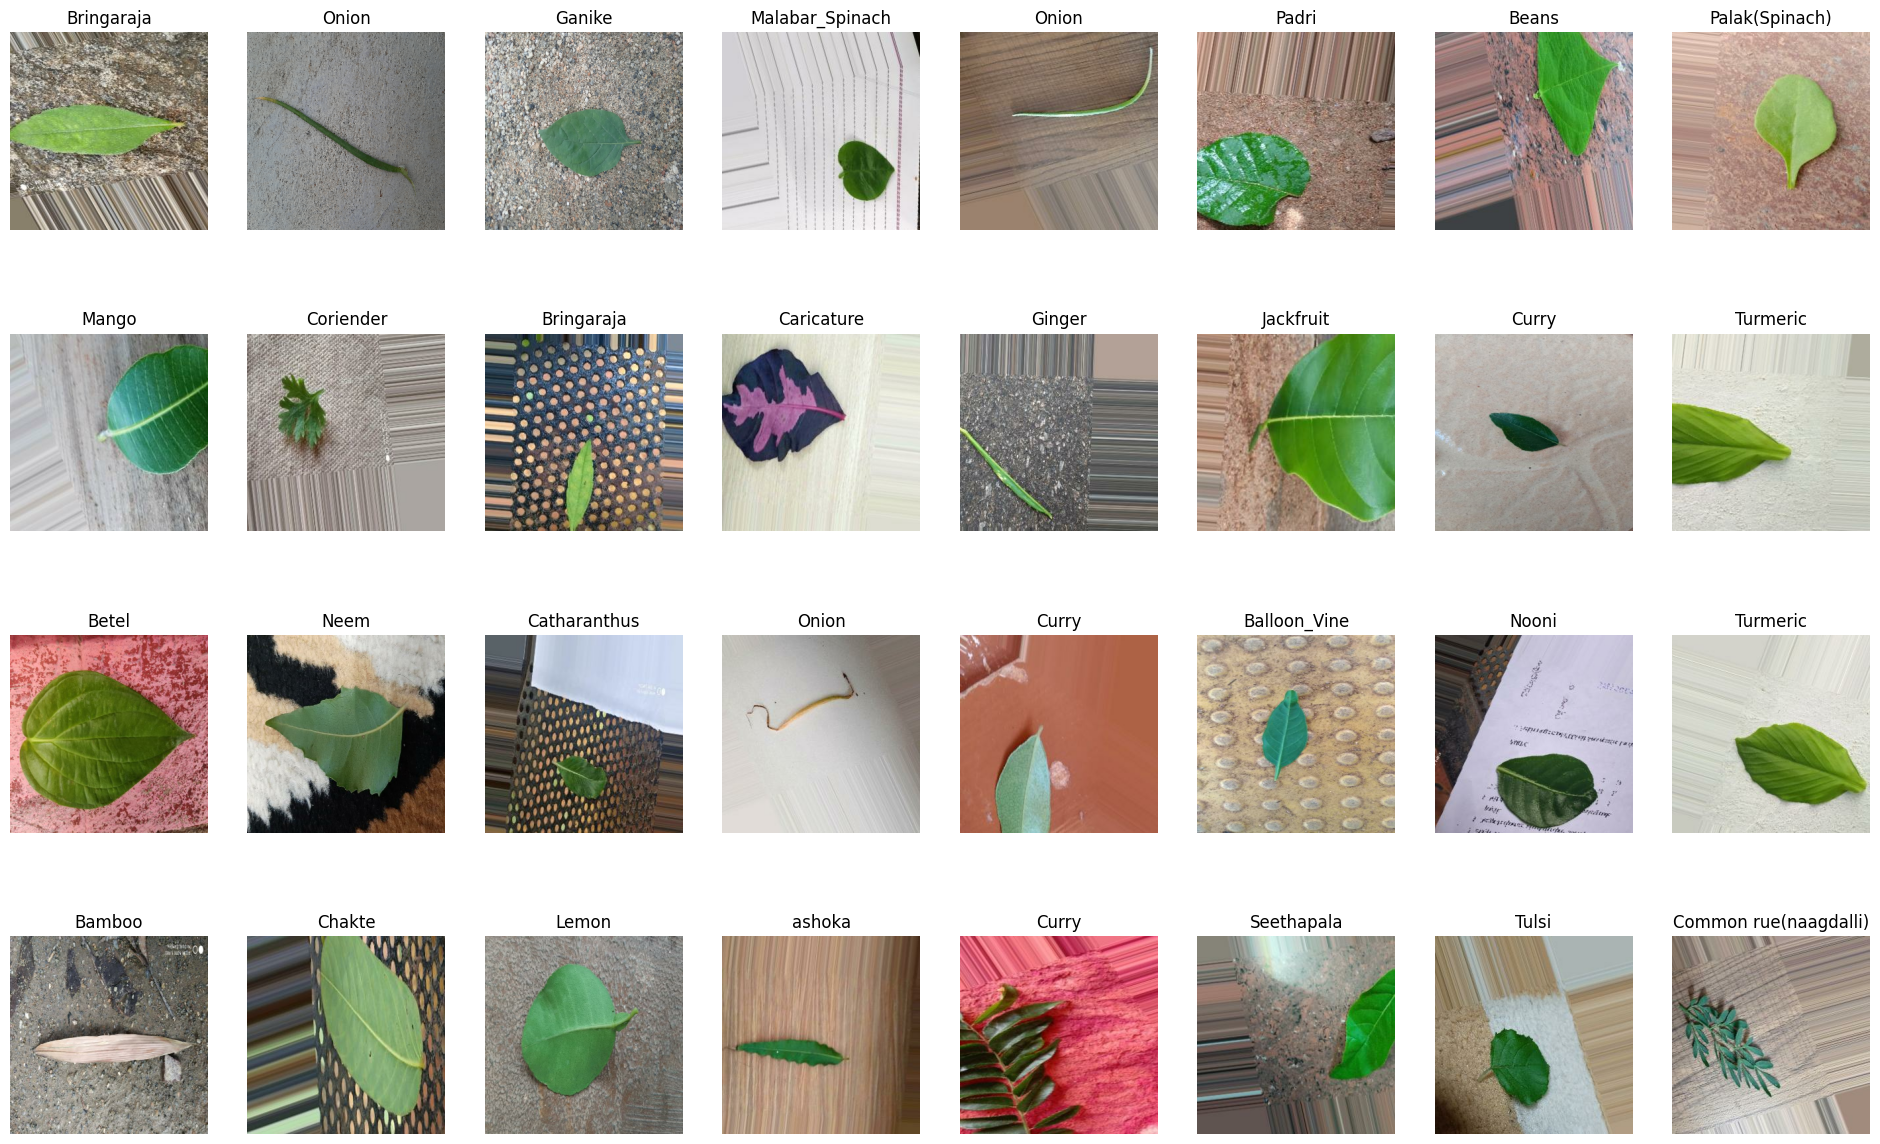

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Take 1 batch from the dataset
for image_batch, labels_batch in train_ds.take(1):
    images = image_batch.numpy()
    labels = labels_batch.numpy()

    plt.figure(figsize=(24, 15))  # Width x Height

    for i in range(len(images)):
        ax = plt.subplot(4, 8, i + 1)  # 4 rows, 8 columns (adjust to your batch size)
        plt.imshow(images[i].astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])  # or use labels[i] if labels are already string names
        plt.axis("off")

    break


In [5]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(299, 299),
    tf.keras.layers.Rescaling(1./255)
])

In [6]:
# train using Xception
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(labels)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
call_back=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=7,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

In [22]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=50,
   callbacks = [call_back, reduce_lr]
)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 70)             │         9,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,133,294 (80.62 MB)

 Trainable params: 271,558 (1.04 MB)

 Non-trainable params: 20,861,736 (79.58 MB)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.2984 - loss: 3.1266 - val_accuracy: 0.7200 - val_loss: 1.2337 - learning_rate: 5.0000e-04
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.7050 - loss: 1.3137 - val_accuracy: 0.7834 - val_loss: 0.8441 - learning_rate: 5.0000e-04
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.8044 - loss: 0.8147 - val_accuracy: 0.8174 - val_loss: 0.6639 - learning_rate: 5.0000e-04
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.8585 - loss: 0.5645 - val_accuracy: 0.8325 - val_loss: 0.5814 - learning_rate: 5.0000e-04
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.8874 - loss: 0.4277 - val_accuracy: 0.8460 - val_loss: 0.5508 - learning_rate: 5.0000e-04
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.9137 - loss: 0.3372 - val_accuracy: 0.8491 - val_loss: 0.5630 - learning_rate: 5.0000e-04
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/ste

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [28]:
model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.8970 - loss: 0.4327


[0.421563982963562, 0.8962264060974121]

In [33]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/ORG/images.jfif', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image most likely belongs to Curry with a 72.78 percent confidence.


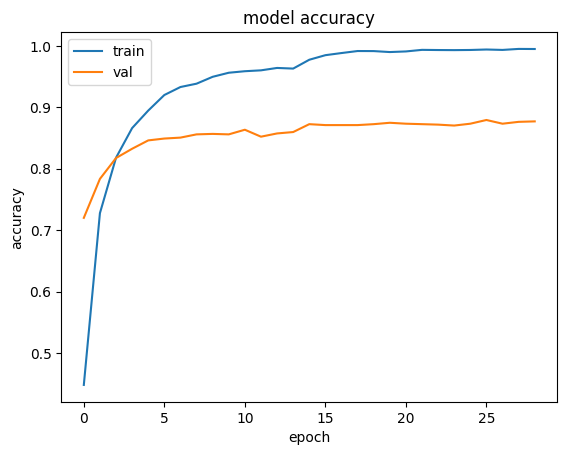

In [26]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Get predictions from the Keras model on the test dataset
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Evaluate using scikit-learn metrics
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Scikit-learn Accuracy: {accuracy:.4f}")

print("\nScikit-learn Classification Report:")
# Assuming 'class_names' is a list containing all 69 of your class names
print(classification_report(true_labels, predicted_classes, target_names=class_names))

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step
Scikit-learn Accuracy: 0.8962

Scikit-learn Classification Report:
                         precision    recall  f1-score   support

               Aloevera       0.93      1.00      0.96        13
                   Amla       0.75      0.75      0.75         8
           Amruthaballi       1.00      1.00      1.00        10
                  Arali       1.00      1.00      1.00        10
             Astma_weed       0.78      0.78      0.78         9
               Badipala       1.00      0.88      0.93         8
           Balloon_Vine       1.00      1.00      1.00        10
                 Bamboo       1.00      1.00      1.00        13
                  Beans       0.91      0.91      0.91        11
                  Betel       1.00      0.85      0.92        13
                 Bhrami       0.91      0.83      0.87        12
             Bringaraja       0.78      0.88      0.82         8
             Caricature       1.00      0.88  

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step


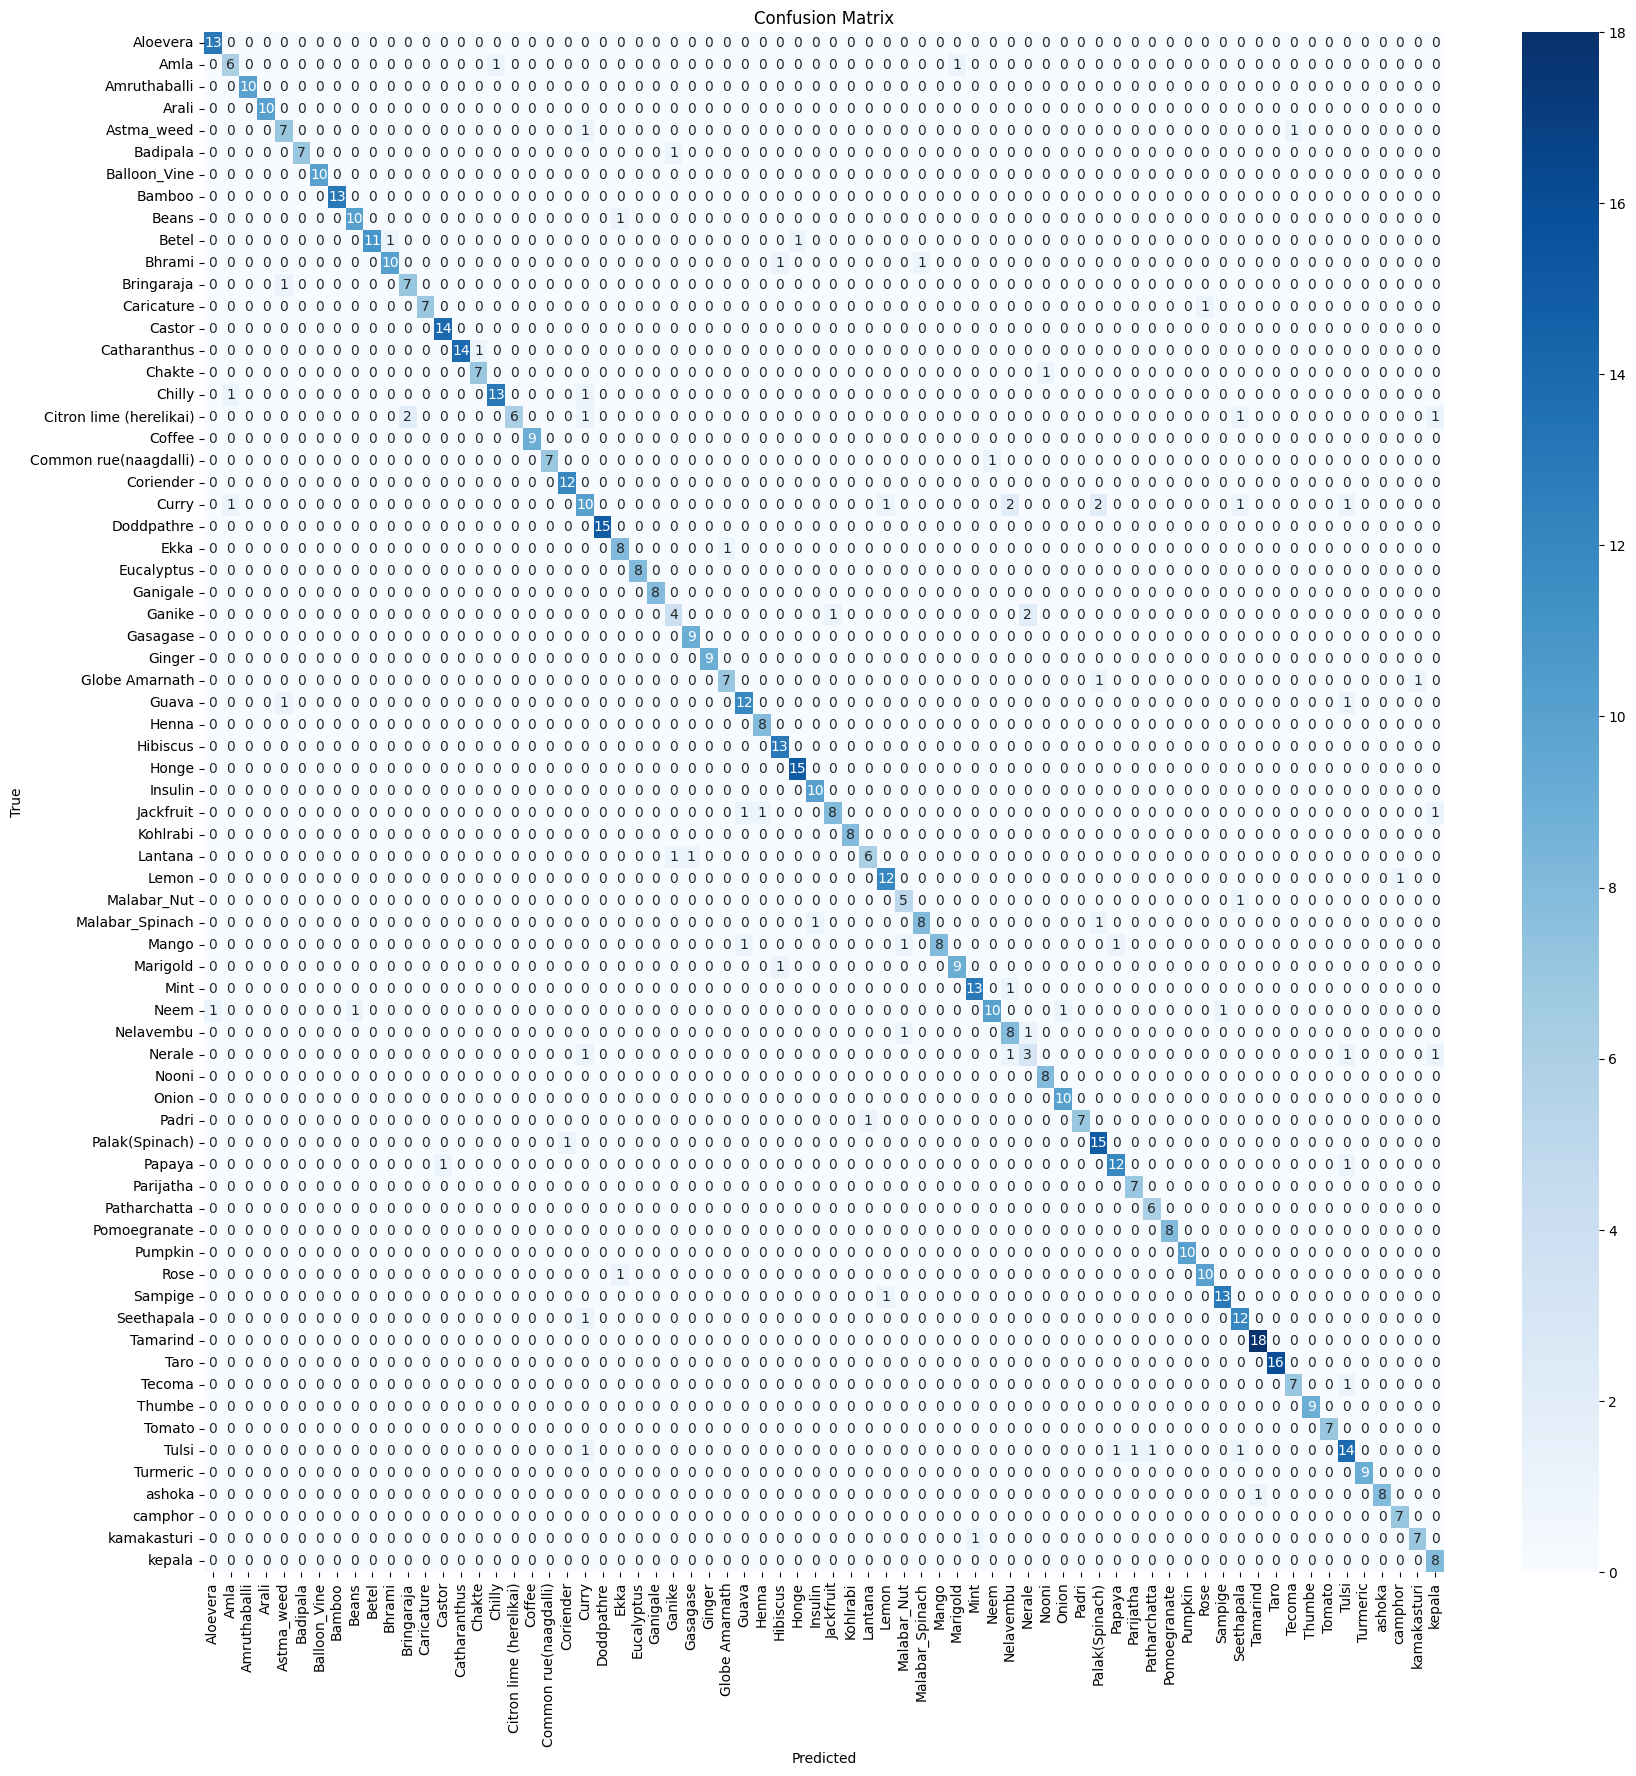

In [24]:
# Get predictions from the Keras model on the test dataset
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Use 'class_names' for both all_labels and actual_labels
cm = confusion_matrix(true_labels, predicted_classes, labels=np.arange(len(class_names)))
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
model.save('IMAGE_MODEL(LR).keras')